# Cargando las librerias requeridas

In [1]:
#Instalando las librerias requeridas
# import sys
# !{sys.executable} -m pip install numpy, pandas, plotnine, sklearn

In [2]:
import numpy as np
import pandas as pd
import plotnine as ptn
from plotnine import *

In [3]:
import sys
print("Python version:",sys.version)
print("Numpy version:",np.__version__)
print("Pandas version:",pd.__version__)
print("Plotnine version:",ptn.__version__)


Python version: 3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
Numpy version: 1.24.2
Pandas version: 2.0.0
Plotnine version: 0.10.1


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2


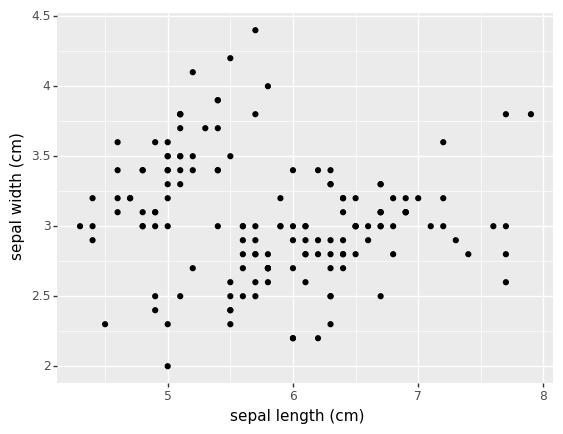

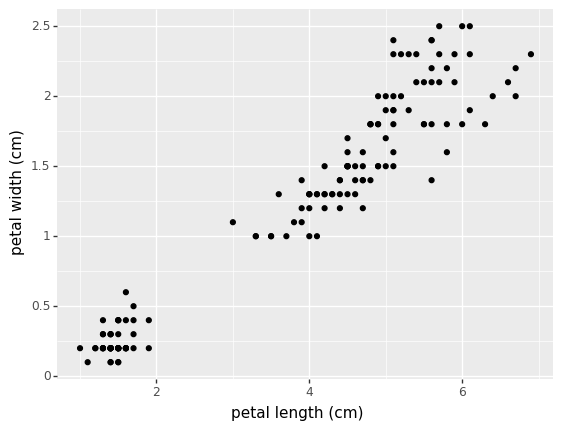

In [4]:
from sklearn import datasets
iris = datasets.load_iris() #Cargando el dataset de la flor de iris


print(iris.keys(),"\n") #Analizando las variables que tiene
iris.feature_names
tempDF=pd.DataFrame(iris.data,columns=iris.feature_names)
print(tempDF.head(2))
print(ggplot(tempDF)+aes(x="sepal length (cm)", y="sepal width (cm)")+ geom_point())
print(ggplot(tempDF)+aes(x="petal length (cm)", y="petal width (cm)")+ geom_point())

# Modelos de la clase sklearn
La mayoría de los modelos de sklearn corresponden a “objetos” de cierta “clase” con propiedades y funciones específicas. En términos prácticos solo se necesita crear una caja mágica que contiene todo lo necesario para aplicar y analizar los modelos.
* from sklearn.xxx import modeloDeseado => Importación del modelo
* nuevoModelo = modeloDeseado() => Creación del modelo
* nuevoModelo.function() => Aplicar alguna función
* nuevoModelo.attribute => Ver los valores de un atributo

# Clase k-means

Existen múltiples parámetros para el modelo k-means:<br>
KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, random_state=None)
* n_clusters => número de clusters
* init => ’k-means++’ inicialización inteligente, 'random' aleatoria 
* n_init => Número de veces que aplicaremos k-means
* max_iter => Máximo número de iteraciones para cada ejecución
* tol => Tolerancia para la convergencia
* random_state => Semilla para inicializar los centroides. Use un entero para ser determinista.

Existen múltiple métodos/funciones para el modelo k-means
* km.fit(data) => entrenar el modelo usando ciertos datos, retorna el modelo entrenado
* km.predict(data) => dado un modelo entrenado, determina a que clase pertenece cada punto, retorna un vector con predicciones

In [5]:
from sklearn.cluster import KMeans
#K-means es una clase con múltiples parámetros, atributos y funciones.
#Para aplicar k-means es necesario crear el objeto y luego aplicarto

#Creando un objeto de k-means con las condiciones iniciales
km = KMeans(n_clusters=4)
print(km)
#El objeto ha sido creado

#Entrenando el modelo con los datos de iris
km=km.fit(tempDF)
print(km)

KMeans(n_clusters=4)
KMeans(n_clusters=4)


c:\Users\acepi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


# Caracteristicas del modelo entrenado
Una vez entrenado el modelo, existen nuevas características que podemos observar (atributos)<br>
Atributos
* cluster_centers: Las coordenadas de los centroides. Si el algoritmo no converge estos no serán consistentes con los labels.
* inertia_float: la suma total de los within cluster distance
* labels: Las etiquetas de cada punto (cluster al que pertenece)
* n_iter_: número de iteraciones del algoritmo

In [6]:
#El modelo ya ha sido entrenado, veamos los resultados
print(km.cluster_centers_) #Mostrando los centros de los clusters

print(km.inertia_) #Within cluster distance

print(km.labels_) #Etiquetas

print(km.n_iter_) #Número de iteraciones del algoritmo

[[6.9125     3.1        5.846875   2.13125   ]
 [5.006      3.428      1.462      0.246     ]
 [5.53214286 2.63571429 3.96071429 1.22857143]
 [6.2525     2.855      4.815      1.625     ]]
57.22847321428572
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 0 0 0 0 2 0 0 0 3
 3 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 0 3 0 0 0 3 0 0 0 3 3
 0 3]
4


# Graficando los clusters

DATOS ORIGINALES
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                5.1               3.5                1.4               0.2  \
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   labels  
0       1  
1       1  
2       1  


CENTROIDES
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0           6.912500          3.100000           5.846875          2.131250  \
1           5.006000          3.428000           1.462000          0.246000   
2           5.532143          2.635714           3.960714          1.228571   
3           6.252500          2.855000           4.815000          1.625000   

   labels  
0       0  
1       1  
2       2  
3       3  


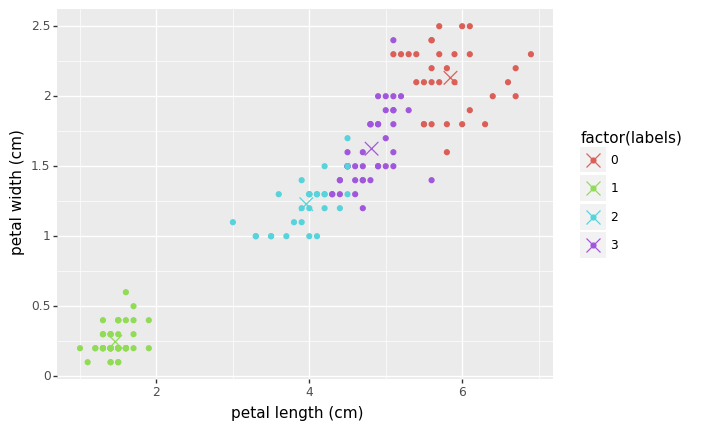

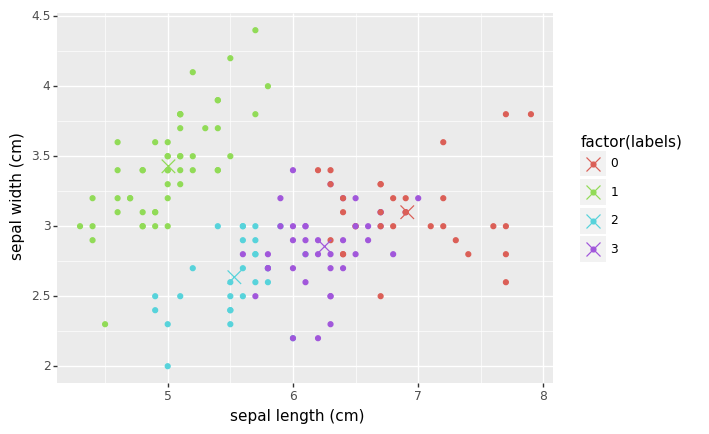

In [7]:
#Creando data frame con los datos y etiquetas
tempDF=pd.DataFrame(iris.data,columns=iris.feature_names)
tempDF['labels']=km.labels_
print("DATOS ORIGINALES\n",tempDF.head(3))

#Creando data frame con los centros y etiquetas
tempDF2=pd.DataFrame(km.cluster_centers_,columns=iris.feature_names)
tempDF2['labels']=range(km.n_clusters)
print("\n\nCENTROIDES\n",tempDF2.head(4))

#creando el gráfico
#(ggplot(tempDF)+aes(x="sepal length (cm)", y="sepal width (cm)",color="factor(labels)")+geom_point()
print(ggplot(tempDF)+aes(x="petal length (cm)", y="petal width (cm)",color="factor(labels)")+geom_point()
    +geom_point(data=tempDF2,shape="x",size=5))
print(ggplot(tempDF)+aes(x="sepal length (cm)", y="sepal width (cm)",color="factor(labels)")+geom_point()
    +geom_point(data=tempDF2,shape="x",size=5))

# Buscando el valor de K

[681.3706, 152.3479517603579, 78.851441426146, 57.22847321428572, 46.44618205128206, 39.054977867477874, 34.29822966507177, 29.98894395078606, 28.347370851370858, 26.174770789496023, 24.13389305526663, 22.578173938634468, 21.34033049282906, 20.46928956582633, 19.36578417196839, 18.8089007936508, 17.13845104078928, 16.433148105771675, 15.228116336278102]


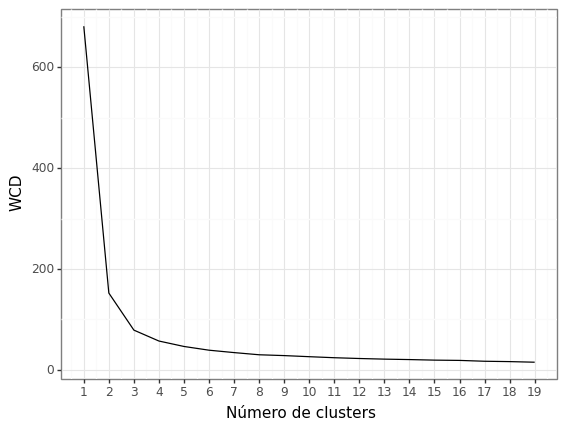

<ggplot: (145318272663)>

In [8]:
sse = [] #Variable para guardar el within cluster distance
numK = 20
for k in range(1, numK): #número de cluster a probar
    #Creando el modelo, entrenandolo y obteniendo el valor del within cluster distance
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(iris.data)
    sse.append(kmeans.inertia_)
#graficando
print(sse)
tempDataFrame=pd.DataFrame(range(1, numK),columns=["numK"])
tempDataFrame["sse"]=sse
(ggplot(tempDataFrame)+aes(x="numK",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
  +scale_x_continuous(breaks=range(1,numK)))

# Buscando el valor de K escalando los datos y multiples iteraciones

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Creamos un objeto de la clase StandardScaler
scaled_features = scaler.fit_transform(iris.data) #estandarización los datos (media 0, varianza 1)
print(scaled_features)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

[600.0000000000001, 222.36170496502308, 139.82543466174204, 114.09254690403088, 90.85510148132353, 80.02249599557437, 70.74938868312893, 62.51086045490567, 55.64476758796552, 48.87066162216517]


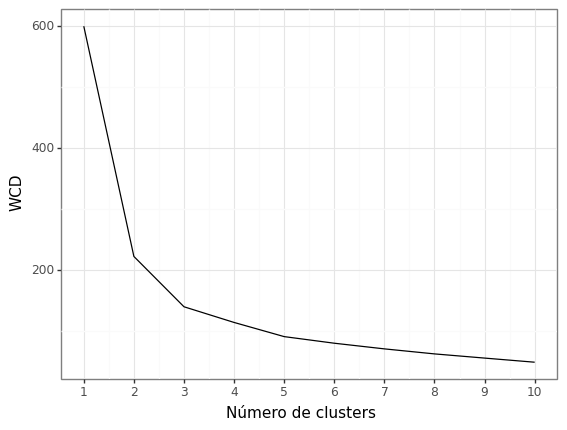

<ggplot: (145318433028)>

In [10]:
#Aplicando el mismo proceso anterior para buscar el número de K
sse = []
numK = 11
for k in range(1, numK):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
print(sse)    
tempDataFrame=pd.DataFrame(range(1, numK),columns=["numK"])
tempDataFrame["sse"]=sse
(ggplot(tempDataFrame)+aes(x="numK",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
 +scale_x_continuous(breaks=range(1,numK)))

# K-modes
Parametros
* n_clusters: número de clusters.
* max_iter: máximo número de iteraciones.
* init: Método de inicialización ('Huang', 'Cao', 'random') default: 'Cao'
* n_init: número de veces que K-modes se ejecuta

Al igual que k-means tiene las funciones fit and predict

Atributos
* cluster_centroids_: Centroide de los clusters
* labels_: Etiqueta de cada punto
* cost_: Suma de todos los puntos con respecto a los centroides
* n_iter_: número de iteraciones para el algoritmo

In [12]:
#Instalando una nueva libreria
# import sys
# !{sys.executable} -m pip install kmodes
from kmodes.kmodes import KModes

In [13]:
#Cargando y viendo los datos
#En el caso de google colab tiene que subir el archivo a la nube primero
bank = pd.read_csv('./data/bank.csv',sep=";")
#https://archive.ics.uci.edu/ml/datasets/bank+marketing#
#Es un subset de esta base de datos

print(bank.head(2),"\n\n")
print("-----")

#Extrayendo las variables nominales
bank_cust = bank[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome']]
print("Variables nominales/ordinales")
print(bank_cust.head(2),"\n\n")
print("-----")

#Agregando edad como variable categorica
bank_cust['edad'] = pd.cut(bank['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                                 labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
print(bank_cust.head(2),"\n\n")
bank_cust.describe() #Viendo el resumen de los datos

FileNotFoundError: [Errno 2] No such file or directory: './data/bank.csv'

In [ ]:
bank_cust.isnull().sum() #verificando si existe algún valor nulo

In [ ]:
bank_cust_orig=bank_cust.copy() #Copia de los datos de origen

#Transformando los datos a números (sklearn no trabaja con datos categóricos)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()
print(bank_cust)

In [ ]:
#Creando el modelo y ajustándolo
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
km_cao = km_cao.fit(bank_cust)
print("Cluster 0:",sum(km_cao.labels_==0))
print("Cluster 1:",sum(km_cao.labels_==1))
print("Cluster 2:",sum(km_cao.labels_==2))

In [ ]:
#Veamos los centroides (no es eficiente)
print(bank_cust.columns)
for i in range(km_cao.n_clusters): #Iterando sobre cada punto
    for j in range(len(km_cao.cluster_centroids_[i,])): #Iterando sobre cada columna
        le.fit(bank_cust_orig.iloc[:,j])
        print(list(le.inverse_transform([km_cao.cluster_centroids_[i,j]]))," ",end="")
    print("")

# Interpretando el modelo

In [ ]:
from sklearn import datasets
wine = datasets.load_wine() #Cargando el dataset de vino
print(wine.keys(),"\n") #Analizando las variables que tiene
print(wine.feature_names) #Analizando las variables que tiene
tempDataFrame=pd.DataFrame(wine.data)
tempDataFrame.describe()

In [ ]:
#Escalando los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Creamos un objeto de la clase StandardScaler
scaled_features = scaler.fit_transform(wine.data) #Transformamos los datos
sse=[]

#Buscando el número de clusters
from sklearn.cluster import KMeans
maxCluster=20
for k in range(1, maxCluster):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
tempDataFrame=pd.DataFrame(range(1, maxCluster),columns=["numK"])
tempDataFrame["sse"]=sse
(ggplot(tempDataFrame)+aes(x="numK",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
 +scale_x_continuous(breaks=range(1,maxCluster)))


In [ ]:
#Aplicando el número de clusters seleccionado
selectedCluster=3
kmeans = KMeans(n_clusters=selectedCluster,n_init=10)
kmeans.fit(scaled_features)

# Interpretando el modelo
## Árbol de clasificación

In [ ]:
#Posteriormente veremos y entenderemos más sobre el árbol de decisión
import matplotlib.pyplot as plt

#Creando un objeto de la clase tree
from sklearn import tree

tempDF=pd.DataFrame(wine.data,columns=wine.feature_names)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(tempDF, kmeans.labels_.astype("str"))

plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names = wine.feature_names,filled=True) 
plt.show()

# Interpretando el modelo
## PCA

In [ ]:
#Creando el objeto y aplicando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_features)
tempData = pca.transform(scaled_features)
tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])
tempData["labels"]=kmeans.labels_
tempData
ggplot(tempData)+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point(show_legend=False)+theme_bw()

In [ ]:
#Analizando los componentes
datapc = pd.DataFrame(pca.components_.transpose(),columns=["PC1","PC2"])
datapc['varNames']=wine.feature_names
datapc
(ggplot(datapc)+
  theme_bw()+
  labs(title="loading plots")+
  geom_text(aes(x="PC1", y="PC2", label="varNames"), size = 10, color="blue")+
  geom_segment(aes(x=0, y=0, xend="PC1", yend="PC2"), arrow=arrow(length=0.1),size=1, alpha=0.75, color="blue")+
  scale_x_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])+
  scale_y_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])+
  geom_hline(yintercept = 0, size=.2)+
  geom_vline(xintercept = 0, size=.2)+
  coord_cartesian([-0.6,0.6],[-0.6,0.6])
)

# Interpretando el modelo
## Análisis de centroides

In [ ]:
KMcentroids=pd.DataFrame(kmeans.cluster_centers_,columns=wine.feature_names)
print(KMcentroids)
tempDF=pd.DataFrame(KMcentroids.std(),columns=["std"])
tempDF["varNames"]=wine.feature_names
tempDF
for i in range(len(tempDF["varNames"])):
    tempDF["varNames"][i] += "-"+str(i)
orderVar=tempDF.sort_values("std")["varNames"]

#Se puede usar un gráfico de cleveland también, pero no debería haber valores en escalas muy distintas
(ggplot(tempDF)
 +aes(y="std",x="varNames")
 +theme_bw()
 +geom_col()
 +scale_x_discrete(limits=orderVar)
 +coord_flip()
 +labs(title="desviación de los centroides",x="")
)

In [ ]:
#Analizando la variable que queremos ver
varToAnalyze=2
tempDF = pd.DataFrame(np.zeros(shape=(kmeans.n_clusters,2)),columns = ["mean","std"])
for i in range(kmeans.n_clusters):
    tempDF["mean"][i]=wine.data[kmeans.labels_==i,varToAnalyze].mean()
    tempDF["std"][i]=wine.data[kmeans.labels_==i,varToAnalyze].std()
    
#Crenado el gráfico
(ggplot(tempDF)
 +aes(x=range(kmeans.n_clusters),y="mean",ymin="mean-std",ymax="mean+std")
 +theme_bw()
 +geom_errorbar()
 +geom_point()
 +scale_x_continuous(breaks=range(kmeans.n_clusters))
 +labs(x="Clusters",y="Media +- std",title=wine.feature_names[varToAnalyze])
)